In [ ]:
# Pandas for data processing and EDA
# EDA = Explanatory Data Analysis: selecting features to use and how

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

# For .read_csv, always use header=0 when you know row 0 is the header row
df = pd.read_csv('train.csv', header=0)

from matplotlib import pyplot as plt

## Looking into data

In [2]:
df.info()  # show columns in a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
df.describe()  # show statistical properties of columns
# notice count shows missing values in Age column

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.head(4)  # let's peek at a chunk of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [5]:
df['Age'][:5]  # also as `df.Age`

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

## Filtering

In [6]:
(df.Age > 60)[:5]  # let's create filtering set of Trues and Falses and look at it

0    False
1    False
2    False
3    False
4    False
Name: Age, dtype: bool

In [7]:
# trying to use that filtering set on our dataset and see what gives


df[df.Age > 60].head(4)  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


## Graphs

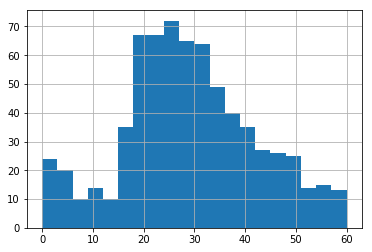

In [8]:
# Let's see general age distribution on a ship
df.Age.hist(range=(0,60), bins=20)

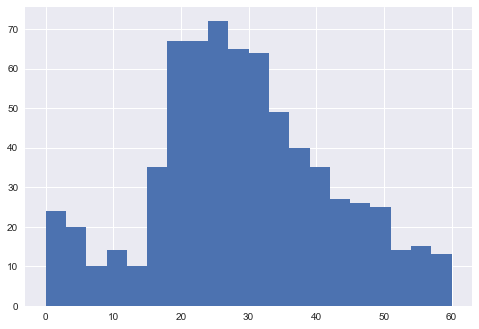

In [9]:
import seaborn as sns # Seaborn makes graphs look prettier
df.Age.hist(range=(0,60), bins=20)

In [10]:
# filtering sets can be combined
df.Age[(df.Survived == 1) & (df.Sex == 'female')].describe()

count    197.000000
mean      28.847716
std       14.175073
min        0.750000
25%       19.000000
50%       28.000000
75%       38.000000
max       63.000000
Name: Age, dtype: float64

In [11]:
df.groupby('Pclass').Survived.count() # technically we could take any column here

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

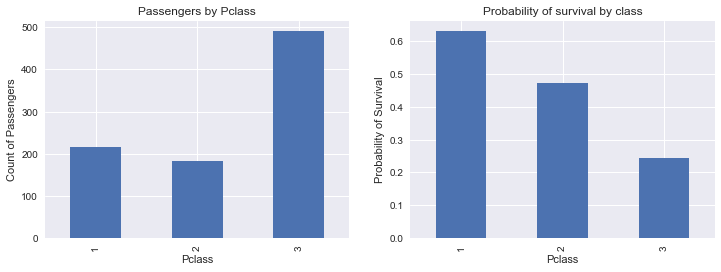

In [12]:
by_class = df.groupby('Pclass').Survived.count()
percentage_by_class = \
    df.groupby('Pclass').Survived.sum() / by_class
    
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Count of Passengers')
ax1.set_title("Passengers by Pclass")
by_class.plot(kind='bar')

ax2 = fig.add_subplot(122)
percentage_by_class.plot(kind = 'bar')
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Probability of Survival')
ax2.set_title("Probability of survival by class")

In [13]:
# we can transpose two inputs to one output (crosstab)
pd.crosstab([df.Pclass, df.Sex], df.Survived.astype(bool))

Survived       False  True 
Pclass Sex                 
1      female      3     91
       male       77     45
2      female      6     70
       male       91     17
3      female     72     72
       male      300     47

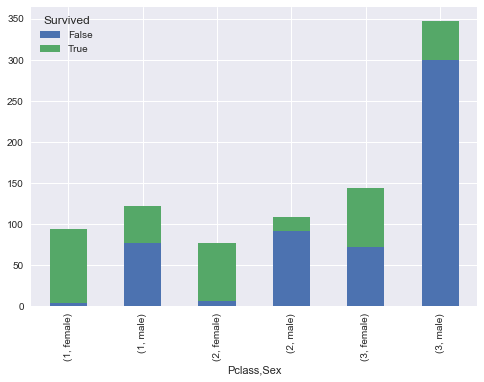

In [14]:
# Let's plot the crosstab
pd.crosstab([df.Pclass, df.Sex], df.Survived.astype(bool)
           ).plot(kind='bar', stacked=True)

## Preparing data

In [15]:
# adding new column is easy
df['Gender'] = 4

In [16]:
df.head(4)  # let's see

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4


In [17]:
df['Gender'] = df['Sex'].map( lambda x: x[0].upper() )  # let's fill it with one letter
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,F
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,F


In [18]:
# but actually we need int
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [19]:
# not all ages are filled in. This will cause us troubles, we have to fill something in.
# one way is to fill NaNs with global age average
df['NewAge'] = df.Age.fillna(df.Age.median())

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,NewAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0


In [22]:
# Or we can get creative and use mean for each age/class group
median_ages = np.zeros((2,3))
median_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [23]:
for i in range(0, 2):
    for j in range(0, 3):
        condition = (df.Gender == i) & (df.Pclass == j+1)
        median_ages[i,j] = df[condition].Age.dropna().median()

median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [24]:
df['AgeFill'] = df['Age']  # this is the column we will fill with new values, initializing it with original

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,NewAge,AgeFill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0,35.0


In [26]:
# looking into those which have NaNs for Age
df[ df.Age.isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,NaN
17,1,2,NaN,NaN
19,0,3,NaN,NaN
26,1,3,NaN,NaN
28,0,3,NaN,NaN
29,1,3,NaN,NaN
31,0,1,NaN,NaN
32,0,3,NaN,NaN
36,1,3,NaN,NaN
42,1,3,NaN,NaN


In [27]:
# filling in with medians
for i in range(0, 2):
    for j in range(0, 3):
        condition = (df.Age.isnull()) & (df.Gender == i) & (df.Pclass == j+1)
        df.loc[condition, 'AgeFill'] = median_ages[i,j]

# checking that it worked
df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


In [28]:
# constructing additional additional feature, may be it would be useful?
df['FamilySize'] = df['SibSp'] + df['Parch']
# taking only few columns. (FamilySize will be included some other time)
clean_df = df[['Survived', 'Gender', 'Pclass', 'AgeFill', ]]
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Survived    891 non-null int64
Gender      891 non-null int64
Pclass      891 non-null int64
AgeFill     891 non-null float64
dtypes: float64(1), int64(3)
memory usage: 27.9 KB


In [29]:
# now export it to NumPy array, because that what most scikit-learn algorithms expect
cleaned_data = clean_df.values
cleaned_data

array([[  0. ,   1. ,   3. ,  22. ],
       [  1. ,   0. ,   1. ,  38. ],
       [  1. ,   0. ,   3. ,  26. ],
       ..., 
       [  0. ,   0. ,   3. ,  21.5],
       [  1. ,   1. ,   1. ,  26. ],
       [  0. ,   1. ,   3. ,  32. ]])

In [ ]:
# Split prepared data into train set and test set

In [30]:
train_data = cleaned_data[:600]

In [31]:
test_data = cleaned_data[600:]

## Training

In [32]:
# Import the random forest package
from sklearn.ensemble import RandomForestClassifier 

# Create the random forest object which will include all the parameters
forest = RandomForestClassifier(n_estimators = 100)

data_wo_survivals = train_data[...,1:]
data_wo_survivals

array([[  1.,   3.,  22.],
       [  0.,   1.,  38.],
       [  0.,   3.,  26.],
       ..., 
       [  1.,   3.,  49.],
       [  1.,   3.,  25.],
       [  1.,   1.,  49.]])

In [33]:
survivals = train_data[...,0]
survivals

array([ 0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,
        0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [34]:
# Fit the training data to the Survived labels and create the decision trees
forest = forest.fit(data_wo_survivals, survivals)  # inputs, target variable

### Prediction

In [35]:
forest.predict([[0, 3, 45]])  # man in 3rd class, 45 y.o. drowns

array([ 0.])

In [36]:
forest.predict([[1, 1, 25]])  # woman in 1st class, 25 y.o. survives

array([ 1.])

In [37]:
# predict for everybody
predicted_survival = forest.predict(data_wo_survivals)

# manually count number of errors on current (training) set
np.absolute(predicted_survival - survivals).sum()

70.0

In [38]:
test_data_wo_survivals = test_data[...,1:]
test_survivals = test_data[...,0]

In [39]:
# predict for everybody
predicted_survival = forest.predict(test_data_wo_survivals)

# manually count number of errors on TESTING set
np.absolute(predicted_survival - test_survivals).sum()

56.0

In [40]:
# we can use one of prepackaged metrics to evaluate quality of our prediction
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(test_survivals, predicted_survival)  # y_true, y_pred

0.80756013745704469